In [71]:
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns

In [72]:
columnNames = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
               ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

num, text = 0, 1
dataType = [num, text, num, text, num, text, text, text, text, text, num, num, num, text]

df = pd.read_csv("../dataset/adult.data", names= columnNames, sep=',')
df = df.replace(' ?', np.nan)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [73]:
for idx, dType in enumerate(dataType):
    if df[columnNames[idx]].isnull().sum().sum() != 0:
        if dType == text:
            df[columnNames[idx]].fillna(df[columnNames[idx]].mode()[0].strip(), inplace=True)
        else:
            df[columnNames[idx]].fillna(df[columnNames[idx]].mean(), inplace=True)

### Use df['columnName'] to extract the column.

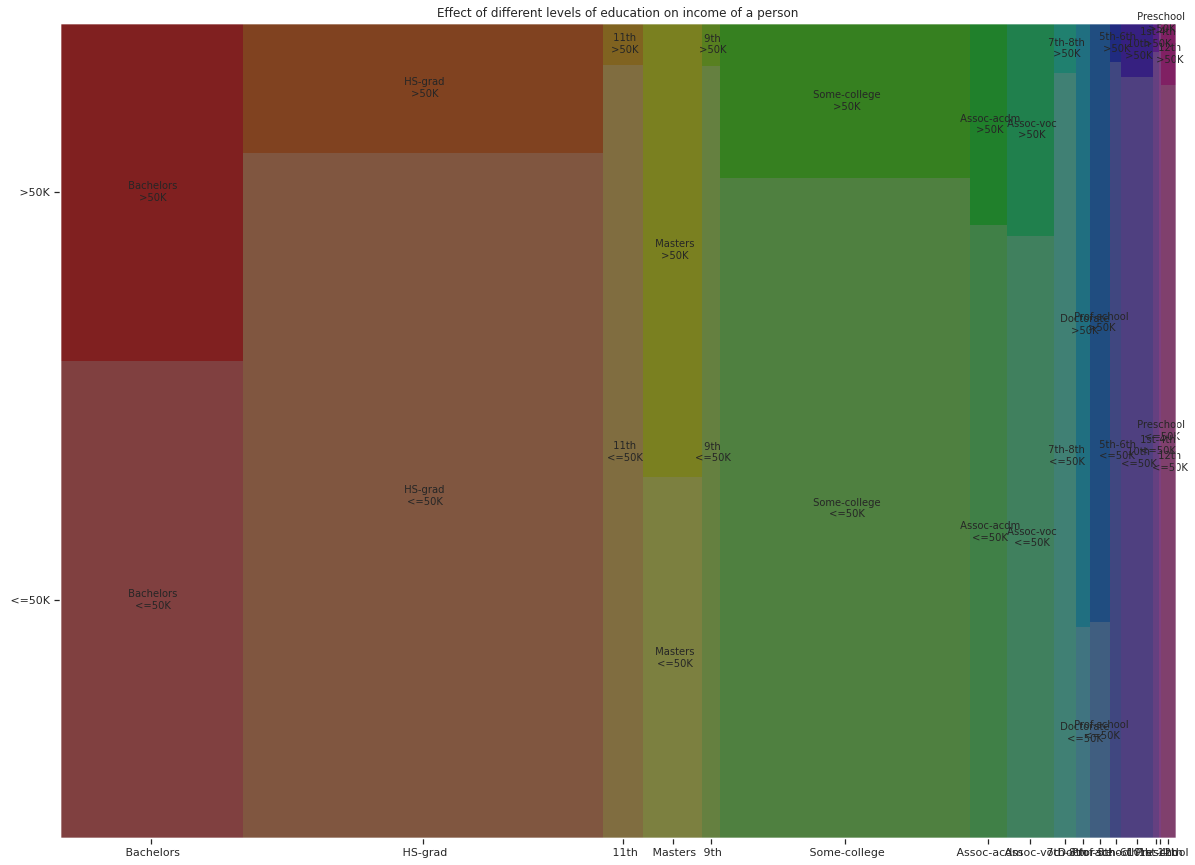

In [74]:
# NATESH TYAGI
# Univariate - 'EDUCATION'

plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(20,15))

mosaic(df, ['education', 'income'], ax=axes, axes_label=True, 
       title='Effect of different levels of education on income of a person', gap=0)
plt.show()

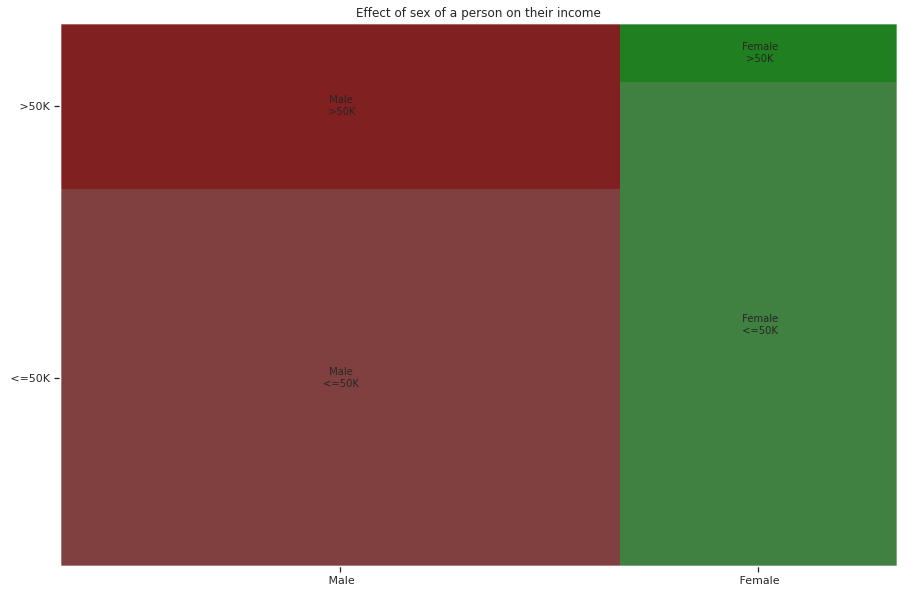

In [75]:
# NATESH TYAGI
# Univariate - 'SEX'

plt.close()

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
mosaic(df, ['sex', 'income'], ax=axes, axes_label=True, gap=0,
       title='Effect of sex of a person on their income')
plt.show()

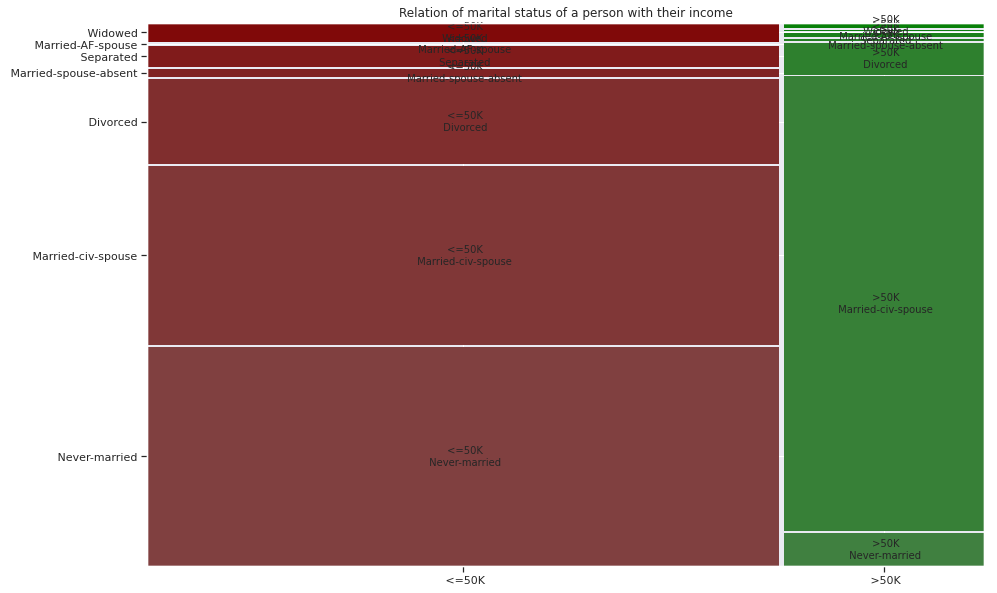

In [76]:
#KARTIK PAIGWAR
#Relation between Maritial Status and Salary using Mosiac Plot
plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
feature = 'marital-status'
label = 'income'
mosaic(df, [label, feature], ax=axes, axes_label=True, title='Relation of marital status of a person with their income')
plt.show()

<AxesSubplot:title={'center':'Relation of Education Level of a person with their income'}, xlabel='count', ylabel='education-num'>

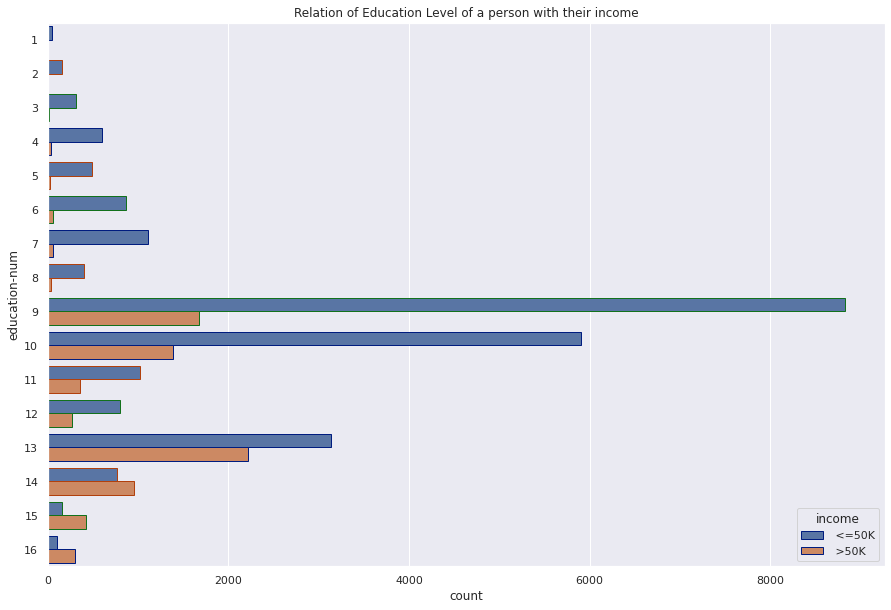

In [77]:
#KARTIK PAIGWAR
#Relation between Education-Num and Salary using Mosiac Plot
fig = plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")
feature ='education-num'
label = 'income'
plt.title("Relation of Education Level of a person with their income")
sns.countplot( y=feature, hue=label, data=df, edgecolor=sns.color_palette("dark", 3)) 

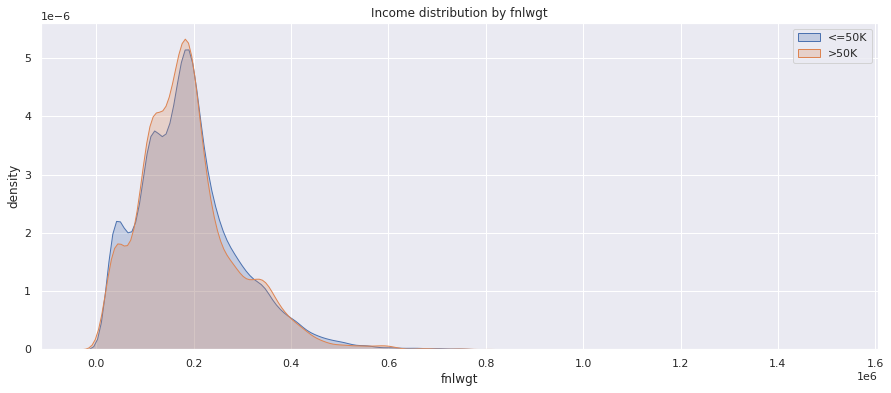

In [78]:
#KARTIK PAIGWAR
fig = plt.figure(figsize=(15,6))
feature ='fnlwgt'
label = 'income'
plot = sns.kdeplot(df.loc[df[label]== " <=50K", feature], label = '<=50K', shade=True)
sns.kdeplot(df.loc[df[label]== " >50K", feature], label = '>50K', shade=True, ax=plot)

plt.title("Income distribution by "+ feature)
plot.set_xlabel(feature)
plot.set_ylabel("density")
plot.legend(loc="upper right")

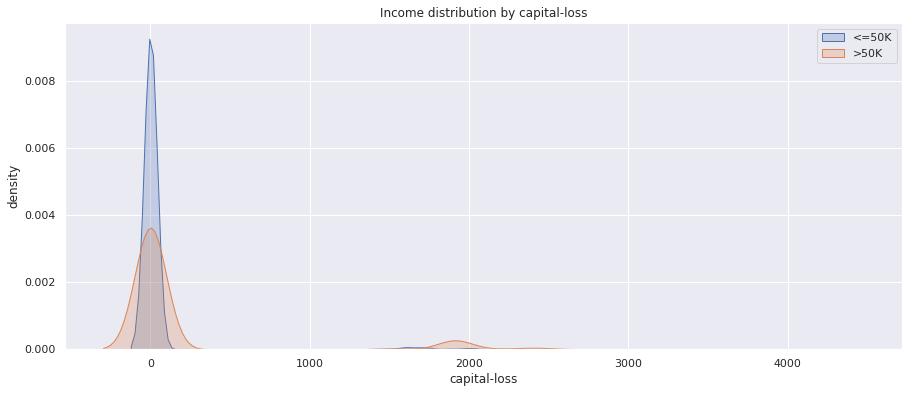

In [79]:
#KARTIK PAIGWAR
fig = plt.figure(figsize=(15,6))
feature ='capital-loss'
label = 'income'
plot = sns.kdeplot(df.loc[df[label]== " <=50K", feature], label = '<=50K', shade=True)
sns.kdeplot(df.loc[df[label]== " >50K", feature], label = '>50K', ax=plot, shade=True)

plt.title("Income distribution by "+ feature)
plot.set_xlabel(feature)
plot.set_ylabel("density")
plot.legend(loc="upper right")

Text(0.5, 1.0, 'Income distribution by hours-per-week')

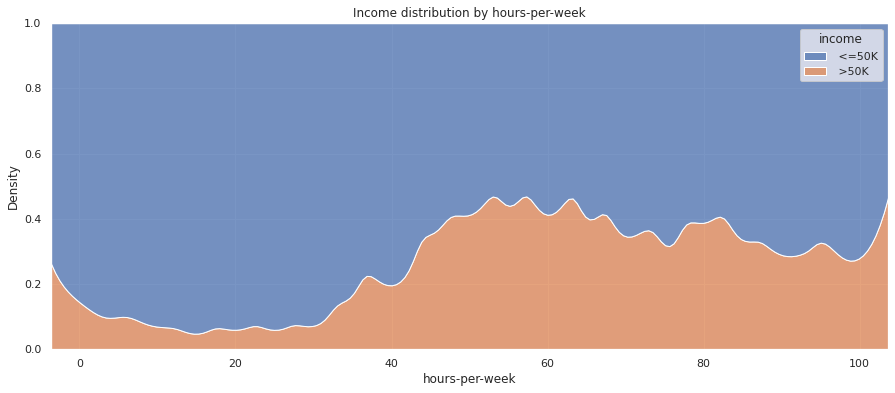

In [80]:
#KARTIK PAIGWAR
fig = plt.figure(figsize=(15,6))
feature ="hours-per-week"
label = "income"
plot = sns.kdeplot(data=df, x=feature, hue=label, multiple="fill")
plt.title("Income distribution by "+ feature)